# Analysis notebook: `SU2020e_CRY_onspill-LH_au`  

## Define analysis name

In [1]:
ana_label = "SU2020e_CRY_onspill-LH_au"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020e_CRY_onspill-LH_au

analysis.csv  events.parquet  info.txt	   SU2020e_CRY_onspill-LH_au.log
cut_flow.csv  hists.h5	      results.pkl  SU2020e_CRY_onspill-LH_au.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020e_CRY_onspill-LH_au


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020e_CRY_onspill-LH_au/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020e_CRY_onspill-LH_au/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020e_CRY_onspill-LH_au/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020e_CRY_onspill-LH_au/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/SU2020e_CRY_onspill-LH_au/events.parquet
[Load] ✅ Loaded info from ../../../output/results/SU2020e_CRY_onspill-LH_au/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2189973,100.000,100.000,No selection applied
1,has_trk_front,Preselect,2188059,99.913,99.913,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,2098551,95.825,95.909,Electron track fits
3,is_downstream,Preselect,1272685,58.114,60.646,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,914920,41.778,71.889,One reco electron / event
5,is_truth_electron,Preselect,271686,12.406,29.695,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,215843,9.856,79.446,Track fit quality > 0.2
7,within_t0,Tracker,172795,7.890,80.056,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,has_hits,Tracker,171006,7.809,98.965,>20 active tracker hits
9,within_d0,Tracker,54509,2.489,31.875,Distance of closest approach (d_0 < 100 mm)


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,21199,3265,397,10,2,1
1,N,4000000,4000000,4000000,21199,3265,397
2,Eff [%],0.529975,0.081625,0.009925,99.952828,99.938744,99.748111
3,Eff Err$-$ [%],-0.003618,-0.001415,-0.000486,-0.017454,-0.061206,-0.405625
4,Eff Err$+$ [%],0.003643,0.00144,0.000511,0.012742,0.030625,0.155635
5,Rate 1B [$\text{day}^{-1}$],55.222204,8.505142,1.034163,0.026049,0.00521,0.002605
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-0.377181,-0.148024,-0.051603,-0.008062,-0.003355,-0.002151
7,Rate 1B Err$+$ [$\text{day}^{-1}$],0.379776,0.150632,0.054254,0.011058,0.006838,0.005961
8,Rate 2B [$\text{day}^{-1}$],42.188392,6.497717,0.790075,0.019901,0.00398,0.00199
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-0.288157,-0.113087,-0.039424,-0.006159,-0.002563,-0.001643


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020e_CRY_onspill-LH_au/h1o_1x3_mom_windows.png


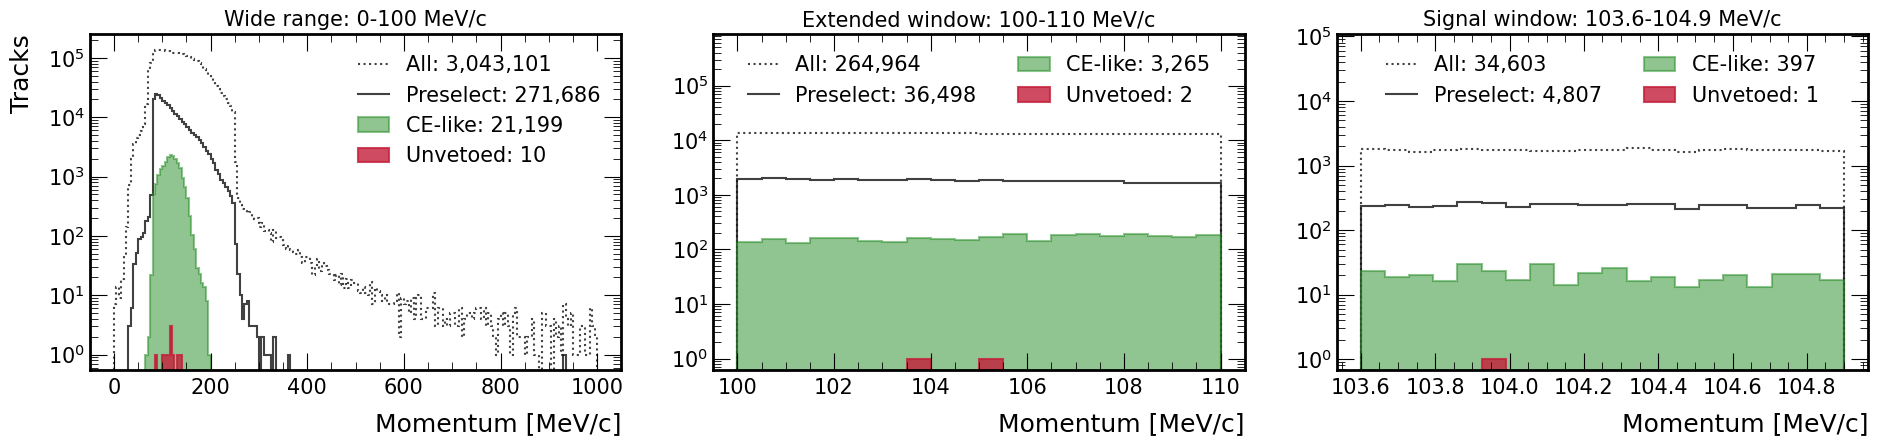

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020e_CRY_onspill-LH_au/h1o_3x3_summary.png


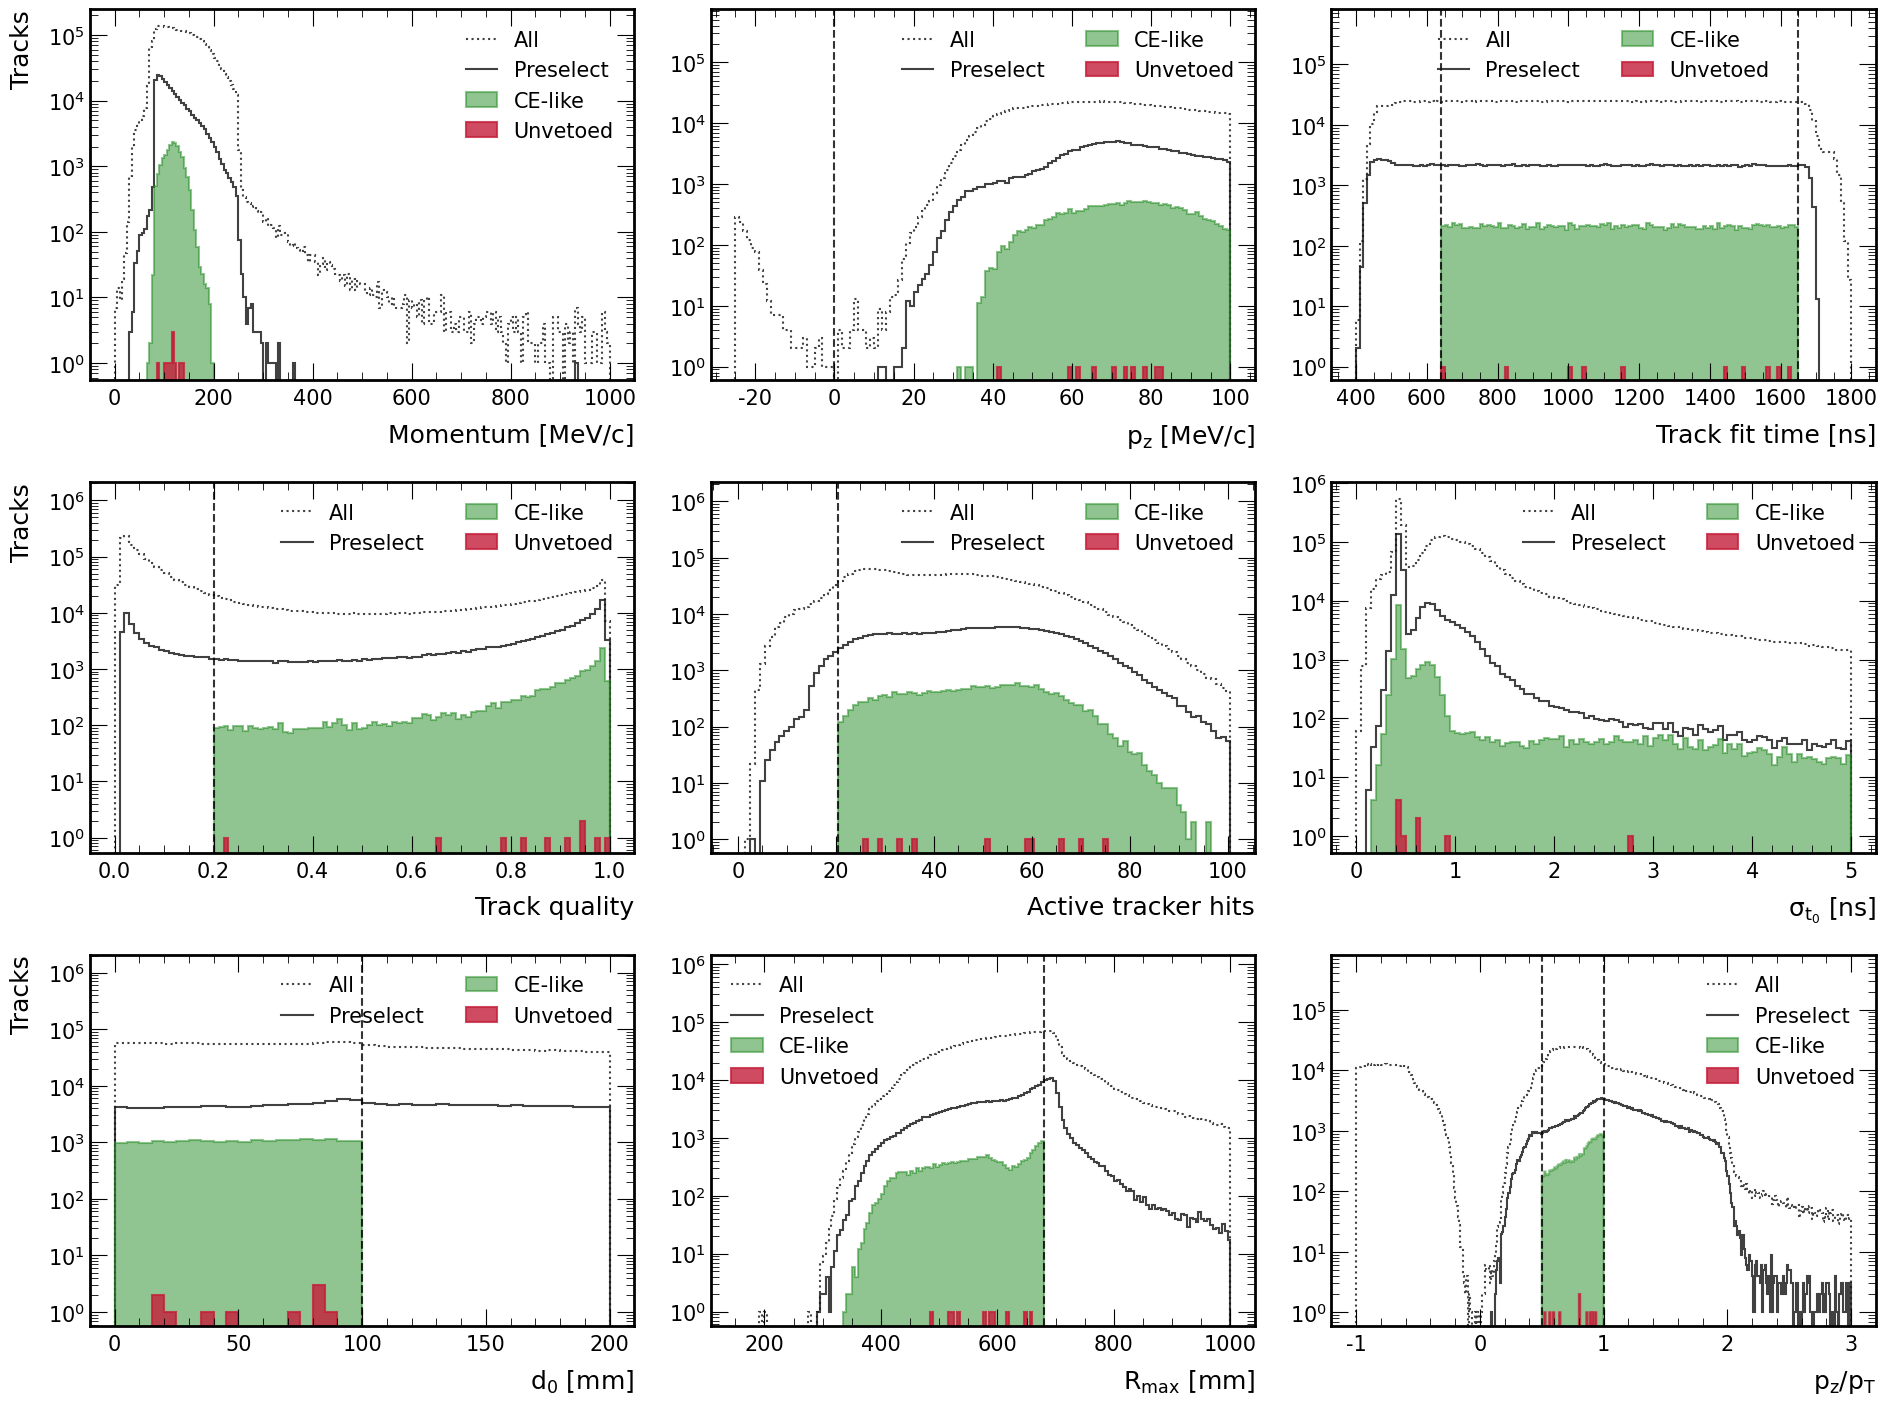

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020e_CRY_onspill-LH_au/h1o_crv_z.png


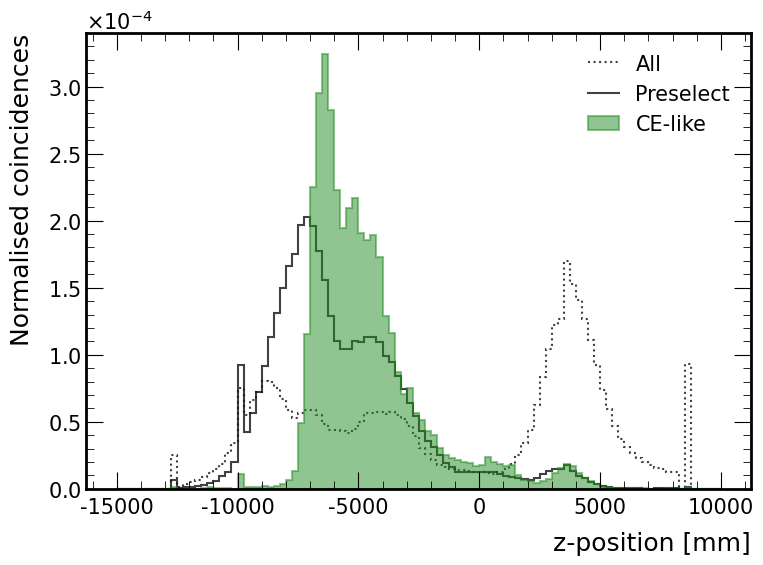

In [11]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [12]:
print(results["event_info"])

  Index:            19
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00000075.root
  Track time [ns]:  1445.887901
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            25
  Subrun:           [3113]
  Event:            [86303]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00000034.root
  Track time [ns]:  1004.101804
  Coinc time [ns]:  853.986267
  dt [ns]:          150.115536
----------------------------------------
  Index:            126
  Subrun:           [10372]
  Event:            [47517]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00008885.root
  Track time [ns]:  1049.419812
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            215
  Subrun:      

In [13]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 10 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 4846
evt.event: 283585
crv.crvcoincs.time: []
crv.crvcoincs.nHits: []
crv.crvcoincs.pos.fCoordinates.fZ: []
at_trk_front: [[False, False, False, False, False, False, True, False, False], ..., [...]]
has_trk_front: [True, True, True, True]
is_reco_electron: [True, False, False, False]
is_downstream: [True, False, True, False]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
is_truth_electron: [True, True, True, True]
good_trkqual: [True, True, True, False]
within_t0: [True, True, True, True]
has_hits: [True, True, True, False]
within_t0err: [True, False, True, False]
within_d0: [True, True, True, True]
pitch_angle: [[0.245, 0.552, 0.553, 0.554, 0.691, 0.898, 0.939, 0.962, 0.975], ..., [...]]
within_pitch_angle_lo: [True, False, True, False]
w